# Libraries

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Fuzzy Input/Output Variables

In [2]:
# Inputs
temperature = ctrl.Antecedent(np.arange(-44, 86, 1), 'temperature')      # °C
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')     # %
feeling = ctrl.Antecedent(np.arange(0, 11, 1), 'feeling')        # 0=cold ... 10=hot
ecology = ctrl.Antecedent(np.arange(0, 11, 1), 'ecology')        # 0=very ecologically concerned ... 10=not concerned by ecology

# Output
heat = ctrl.Consequent(np.arange(10, 35, 1), 'heat')       # heating level °C

# It's gonna show us to which temperature we should heat/cool the room.

# Membership Functions

In [3]:
room = 'living room'

In [4]:
def temp_membership_func(var, b1, c1, s1, m1, s2, m2, s3 ,m3, b2, c2):
    # for the b parameter we set the mean of our data and for c the standard deviation, even though this is not totally accurate and we would need a curve fitting, we think these are relatively acceptable parameters
    var['very cold']    = fuzz.sigmf(var.universe, b=b1,  c=-c1)
    var['chilly']    = fuzz.gaussmf(var.universe, sigma=s1,  mean=m1)
    var['comfortable']  = fuzz.gaussmf(var.universe, sigma=s2,  mean=m2)
    var['rather hot']     = fuzz.gaussmf(var.universe, sigma=s3,  mean=m3)
    var['very hot']     = fuzz.sigmf(var.universe, b=b2,  c=c2)


In [5]:
if room == 'bathroom':
    temp_membership_func(temperature, 15.38, 2.73, 2.60, 17.75, 1.91, 21.75, 2.10, 25.88, 28.68, 1.69)
    temp_membership_func(heat, 15.38, 2.73, 2.60, 17.75, 1.91, 21.75, 2.10, 25.88, 28.68, 1.69)

elif room == 'kitchen':
    temp_membership_func(temperature, 12.75, 3.49, 3.14, 16.88, 3.55, 21.00, 3.98, 25.19, 28.25, 4.37)
    temp_membership_func(heat, 12.75, 3.49, 3.14, 16.88, 3.55, 21.00, 3.98, 25.19, 28.25, 4.37)

elif room == 'bedroom':
    temp_membership_func(temperature, 13.39, 4.68, 2.06, 15.59, 3.08, 18.83, 2.76, 23.11, 25.08, 2.46)
    temp_membership_func(heat, 13.39, 4.68, 2.06, 15.59, 3.08, 18.83, 2.76, 23.11, 25.08, 2.46)

#else: # room in living room or any other room (standard)
#    temp_membership_func(temperature, 13.00, 3.16, 2.67, 17.62, 2.91, 21.07, 4.49, 26.77, 29.50, 4.66)
#    temp_membership_func(heat, 13.00, 3.16, 2.67, 17.62, 2.91, 21.07, 4.49, 26.77, 29.50, 4.66)

else: # room in living room or any other room (standard)
    temp_membership_func(temperature, 13.00, 3.16, 2.67, 17.62, 2.91, 21.07, 2.49, 26.77, 29.50, 4.66)
    temp_membership_func(heat, 13.00, 3.16, 2.67, 17.62, 2.91, 21.07, 2.49, 26.77, 29.50, 4.66)



# according to https://atmotube.com/blog/ideal-household-humidity-level, a good humidity for inside is 40-50% --> 45% should be optimal
humidity['low']    = fuzz.trapmf(humidity.universe, [0, 0, 0, 45])
humidity['medium']     = fuzz.trimf(humidity.universe, [0, 45, 100])
humidity['high']   = fuzz.trapmf(humidity.universe, [45, 100, 100, 100])

feeling['too cold']    = fuzz.trapmf(feeling.universe, [0, 0, 0, 5])
feeling['okay']   = fuzz.trimf(feeling.universe, [0, 5, 10])
feeling['too hot']     = fuzz.trapmf(feeling.universe, [5, 10, 10, 10])

ecology['not eco']    = fuzz.trapmf(ecology.universe, [0, 0, 0, 5])
ecology['medium']   = fuzz.trimf(ecology.universe, [0, 5, 10])
ecology['eco']     = fuzz.trapmf(ecology.universe, [5, 10, 10, 10])




/Users/sophie/opt/miniconda3/envs/fuzzy/lib/python3.13/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


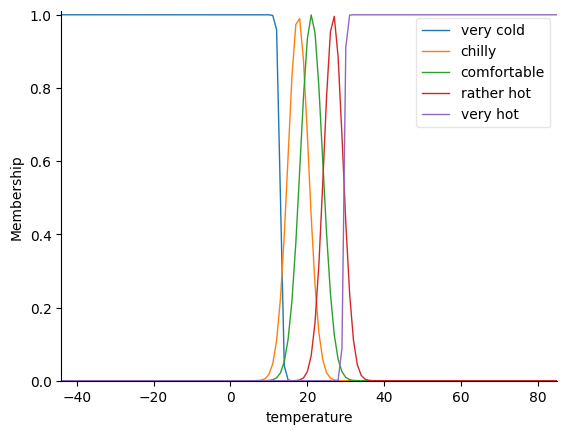

In [6]:
temperature.view()

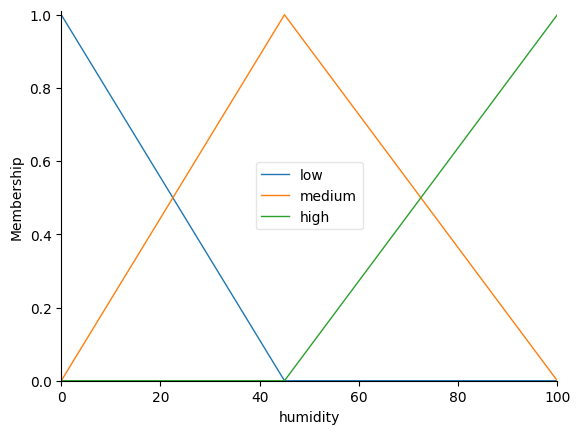

In [7]:
humidity.view()

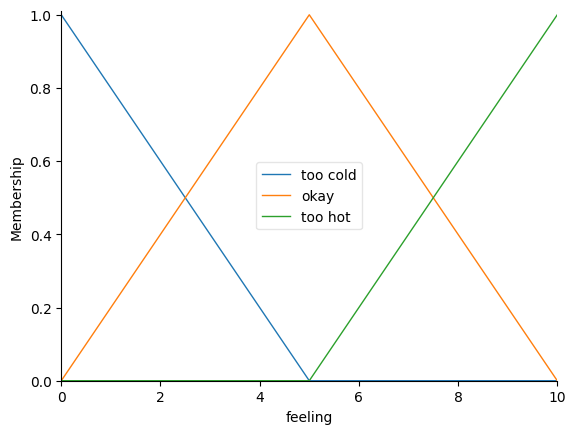

In [8]:
feeling.view()

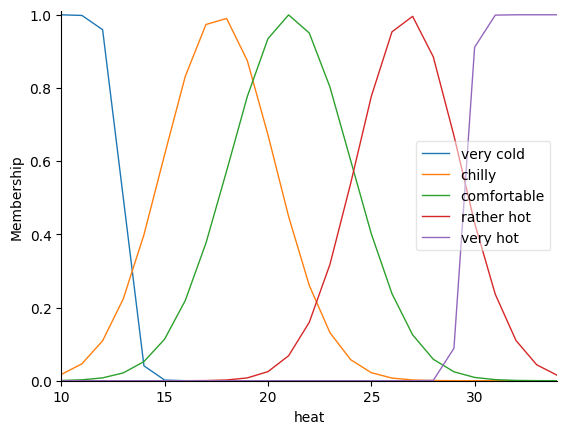

In [9]:
heat.view()

# Rules

In [10]:
# Fuzzy Rules

# treating extreme temperature cases --> we set a comfortable temperature readardless of any other parameters
r1 = ctrl.Rule(temperature['very hot'], heat['comfortable'])
r2 = ctrl.Rule(temperature['very cold'], heat['comfortable'])

# taking into accound the temperature (mild ones) and the feeling to set the heating target temperature
r3 = ctrl.Rule(temperature['chilly'] & feeling['too cold'], heat['rather hot'])
r4 = ctrl.Rule(temperature['chilly'] & feeling['too hot'], heat['very cold'])
r5 = ctrl.Rule(temperature['rather hot'] & feeling['too cold'], heat['very hot'])
r6 = ctrl.Rule(temperature['rather hot'] & feeling['too hot'], heat['chilly'])
r7 = ctrl.Rule(temperature['chilly'] & feeling['okay'], heat['chilly'])
r8 = ctrl.Rule(temperature['rather hot'] & feeling['okay'], heat['rather hot'])
r9 = ctrl.Rule(temperature['comfortable'] & feeling['too hot'], heat['chilly'])
r10 = ctrl.Rule(temperature['comfortable'] & feeling['okay'], heat['comfortable'])
r11 = ctrl.Rule(temperature['comfortable'] & feeling['too cold'], heat['rather hot'])

# taking into account the temperature and the ecology, the ecology dampens the changes
r12 = ctrl.Rule((temperature['very cold'] | temperature['chilly']) & ecology['eco'], heat['chilly'])
r13 = ctrl.Rule((temperature['very hot'] | temperature['rather hot']) & ecology['eco'], heat['rather hot'])
r14 = ctrl.Rule((temperature['very cold'] | temperature['chilly']) & ecology['medium'], heat['comfortable'])
r15 = ctrl.Rule((temperature['very hot'] | temperature['rather hot']) & ecology['medium'], heat['comfortable'])
r16 = ctrl.Rule((temperature['very cold'] | temperature['chilly']) & ecology['not eco'], heat['rather hot'])
r17 = ctrl.Rule((temperature['very hot'] | temperature['rather hot']) & ecology['not eco'], heat['chilly'])

# taking into account the humidity, the humidity makes the feelings more extreme, so the temperature should be closer to a comfortable one if the humidity is high
# the humidity only has a limited impact on the output as some other parameters are way more important
r18 = ctrl.Rule(humidity['high'], heat['comfortable'])
r19 = ctrl.Rule(humidity['medium'] & feeling['too hot'], heat['comfortable'])
r20 = ctrl.Rule(humidity['medium'] & feeling['too cold'], heat['comfortable'])

heating_ctrl = ctrl.ControlSystem([r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16,r17,r18,r19,r20])
heating_sim = ctrl.ControlSystemSimulation(heating_ctrl)


In [11]:
# ===== TEST SIMULATION EXAMPLE =====

# Example scenario:
# - living room, membership already defined above
# - temperature: 18°C (a bit cold)
# - humidity: 60% (slightly humid)
# - feeling: 3/10 (closer to 'too cold' region, but overlapping with 'okay')
# - ecology: 2/10 (eco-friendly)

heating_sim.input['temperature'] = 18
heating_sim.input['humidity'] = 60
heating_sim.input['feeling'] = 3
heating_sim.input['ecology'] = 2

heating_sim.compute()
print("Computed heat output:", heating_sim.output['heat'])

Computed heat output: 22.039934390200013


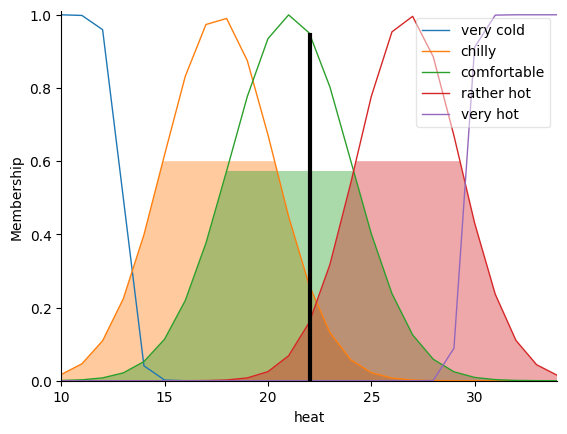

In [12]:
heat.view(sim=heating_sim)